<a href="https://colab.research.google.com/github/katkuridhanush/NLP_2024-25/blob/main/Copy_of_Nlp_ass_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:

# Load the dataset (replace with your Kaggle data)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])
data = data.values

In [ ]:

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [ ]:
def create_dataset(dataset, time_step=1):
   dataX, dataY = [], []
   for i in range(len(dataset) - time_step - 1):
      a = dataset[i:(i + time_step), 0]
      dataX.append(a)
      dataY.append(dataset[i + time_step, 0])
   return np.array(dataX), np.array(dataY)



In [ ]:
# Define time step (how many past time points are used for prediction)
time_step = 10
X, y = create_dataset(scaled_data, time_step)

In [ ]:

# Reshape X to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:

# Build the LSTM Model
model = Sequential()
model.add(LSTM(100, input_shape=(time_step, 1), return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - loss: 0.0820 - val_loss: 0.0977
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0226 - val_loss: 0.0209
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0125 - val_loss: 0.0377
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0149 - val_loss: 0.0221
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0093 - val_loss: 0.0273
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0094 - val_loss: 0.0362
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - val_loss: 0.0308
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0108 - val_loss: 0.0224
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0079 - val_loss: 0.0231
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0086 - val_loss: 0.0263
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0078 - val_loss: 0.0235
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0061 - val_loss: 0.0219


In [ ]:

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0267
Test Loss: 0.026736104860901833


In [ ]:

# Predict the test dataset
predicted = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


In [ ]:
# Inverse transform the predictions and actual values to compare
predicted = scaler.inverse_transform(predicted)
y_test_scaled = scaler.inverse_transform([y_test])


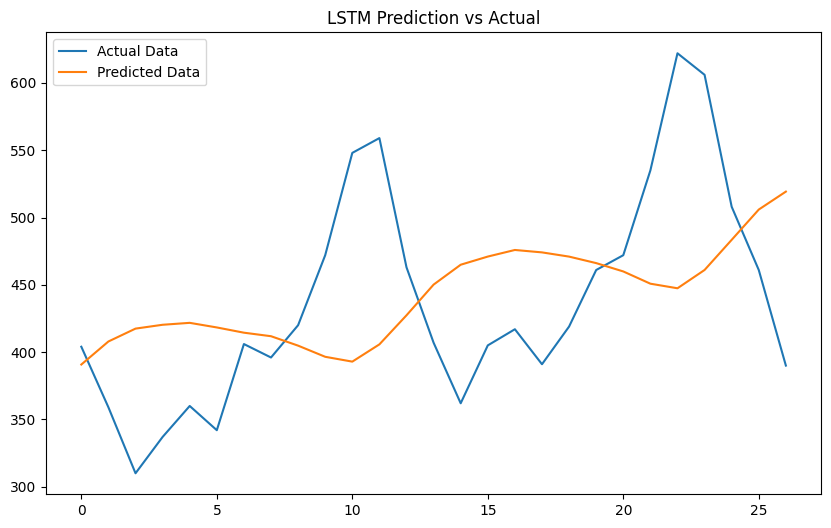

In [ ]:

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_scaled[0], label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('LSTM Prediction vs Actual')
plt.legend()
plt.show()